# Test Mo(s) heat capacity data across phase transition
In this notebook, I plot the heat capacity data for Mo(s) to determine whether or not its phase transition is correctly accounted for in heat capacity calculations. 

## Import Libraries

In [6]:
import thermofun as fun
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Initialize a thermodynamic database

In [7]:
database = fun.Database('./databases/Mo(s).json') # data copied from heracles-thermofun.json

### Check the contents of the database (optional)

In [8]:
substances = database.mapSubstances()
print(substances.keys())

dict_keys(['Mo'])


## Set temperature range and define Maier-Kelly equation symbolically as an array of terms

In [ ]:
# temperature array
temp = np.linspace(300,2500,400) [K]

# define symbol T (temperature) for symbolic math
T = sp.symbols('T') 

# array of terms in Cp polynomial (w/o fit. params)
poly_term= sp.Array([T**0, T**1, T**-2, T**-0.5, T**2, T**3]) 

## Calculate Mo(s) heat capacity by hand

In [11]:
# Mo heat capacity parameters for range 273-1900 K (copied directly from Mo(s).json file)
Cp_coeff_low = np.array([24.729999542236,       # [J*mol^-1*K^-1]
                         0.0039599998854101,    # [J*mol^-1*K^-2]
                         -170000,               # [J*mol^-1*K]
                         0,                     # [J*mol^-1*K^-1/2]
                         -0.000001269999984288, # [J*mol^-1*K^-3]
                         1.1499999841291e-9])   # [J*mol^-1*K^-4]

# Mo heat capacity parameters for range 1900-2896 K (copied directly from Mo(s).json file)
Cp_coeff_high = np.array([1231.1899414062,      # [J*mol^-1*K^-1]
                         -0.96299999952316,     # [J*mol^-1*K^-2]
                         -712000000,            # [J*mol^-1*K]
                         0,                     # [J*mol^-1*K^-1/2]
                         0.00028400000883266,   # [J*mol^-1*K^-3]
                         -2.8000000540373e-8])  # [J*mol^-1*K^-4]

# initialize heat capacity array
Cp_by_hand = np.zeros(len(temp)) # [J*mol^-1*K^-1]

for i, T_val in enumerate(temp): 
    # calculate heat capacity by hand
    if T_val <= 1900: # [K]
        # heat capacity for low temp. range
        Cp_by_hand[i] = np.dot(Cp_coeff_low, poly_term.subs(T, T_val)) # [J*mol^-1*K^-1]
    else: 
        # heat capacity for high temp. range
        Cp_by_hand[i] = np.dot(Cp_coeff_high, poly_term.subs(T, T_val)) # [J*mol^-1*K^-1]

## Calculate Mo(s) heat capacity over a temperature range using ThermoFun

In [13]:
# create engine for calculating heat capacity using ThermoFun
engine = fun.ThermoEngine(database) 

# initialize heat capacity array
Cp_ThermoFun = np.zeros(len(temp)) # [J*mol^-1*K^-1]

for i, T_val in enumerate(temp): 
    # calculate heat capacity using ThermoFun
    Cp_ThermoFun[i] = engine.thermoPropertiesSubstance(T_val, 2000e5, "Mo").heat_capacity_cp.val # [J*mol^-1*K^-1]

## Plot the results

Text(0, 0.5, 'Cp (J*mol^-1*K^-1)')

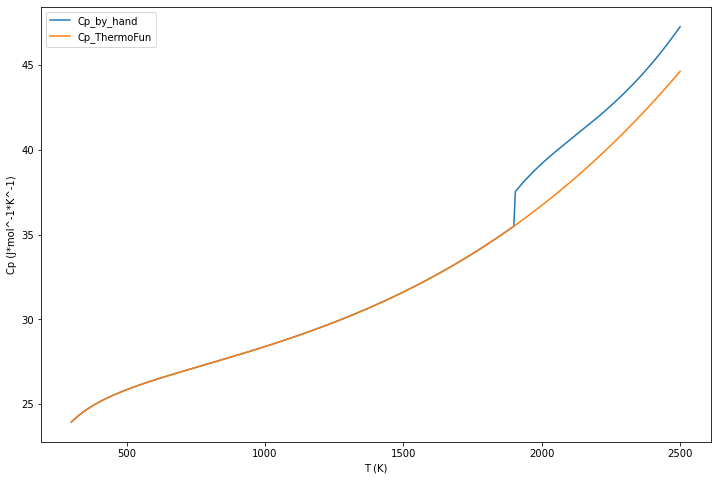

In [15]:
fig0, ax0 = plt.subplots(figsize=(12,8))

ax0.plot(temp,Cp_by_hand)
ax0.plot(temp,Cp_ThermoFun)
ax0.legend(['Cp_by_hand', 'Cp_ThermoFun'])
ax0.set_xlabel('T (K)')
ax0.set_ylabel('Cp (J*mol^-1*K^-1)')